In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/ITBAN3 - Fundamentals of Analytics Modelling | 2nd Sem AY 2023-2024

/content/drive/MyDrive/ITBAN3 - Fundamentals of Analytics Modelling | 2nd Sem AY 2023-2024


#Step 1: Using the Colab notebook, import the following packages/ libraries/ modules:

- OS

- Numpy

- Pandas

- Matplotlib

- Seaborn

- Warnings (to suppress warnings)

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

#Step 2: Import and load the dataset. Set the client_id as the index.

In [ ]:
df = pd.read_csv('loans.csv', index_col='client_id')

#Step 3: Display the contents of the dataset by showing its first 5 rows.

In [ ]:
print(df.head())

          loan_type  loan_amount  repaid  loan_id  loan_start    loan_end  \
client_id                                                                   
46109          home        13672       0    10243  2002-04-16  2003-12-20   
46109        credit         9794       0    10984  2003-10-21  2005-07-17   
46109          home        12734       1    10990  2006-02-01  2007-07-05   
46109          cash        12518       1    10596  2010-12-08  2013-05-05   
46109        credit        14049       1    11415  2010-07-07  2012-05-21   

           rate  
client_id        
46109      2.15  
46109      1.25  
46109      0.68  
46109      1.24  
46109      3.13  


#Step 4: Check the info of the dataset and the datatypes for each columns.

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 46109 to 26945
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_type    443 non-null    object 
 1   loan_amount  443 non-null    int64  
 2   repaid       443 non-null    int64  
 3   loan_id      443 non-null    int64  
 4   loan_start   443 non-null    object 
 5   loan_end     443 non-null    object 
 6   rate         443 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 27.7+ KB
None


#Step 5: Determine whether the dataset has missing values.

In [ ]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 loan_type      0
loan_amount    0
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           0
dtype: int64


#Step 6: Check if there is a presence of outliers using Boxplot.

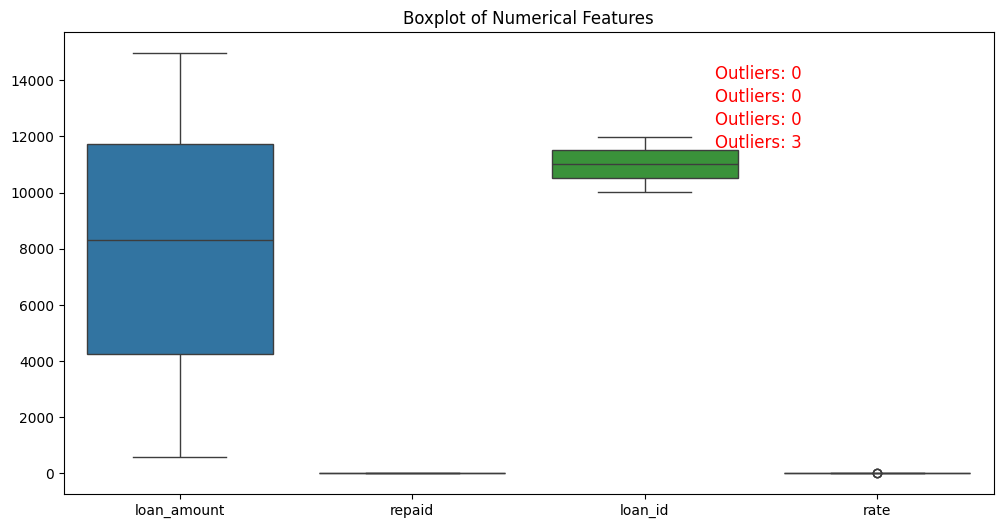

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Boxplot of Numerical Features")

numerical_columns = df.select_dtypes(include=[np.number]).columns

for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    num_outliers = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()

    plt.annotate(f'Outliers: {num_outliers}',
                 xy=(0.7, 0.9 - 0.05 * numerical_columns.get_loc(column)),
                 xycoords='axes fraction', fontsize=12, color='red')

plt.show()


#Step 7: If there are a presence of outliers, do the following and explain the results:


A. Treat them using SQRT transformation

In [ ]:
numerical_columns = df.select_dtypes(include=[np.number]).columns
df_sqrt_transformed = df.copy()
df_sqrt_transformed[numerical_columns] = np.sqrt(df[numerical_columns])

B. Treat them using the capping approach: Z-Score.

In [ ]:
from scipy.stats import zscore

z_scores = zscore(df[numerical_columns])
df_z_capped = df.copy()
df_z_capped[(z_scores > 3) | (z_scores < -3)] = np.nan

#Step 8: Upon checking the datatypes for each columns, for numerical variables, apply scaling using Min-Max Normalization. Display the skewness and kurtosis graphs for Loan Amount and explain the results.

Apply Min-Max Normalization to numerical variables

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

Display skewness and kurtosis graphs for Loan Amount

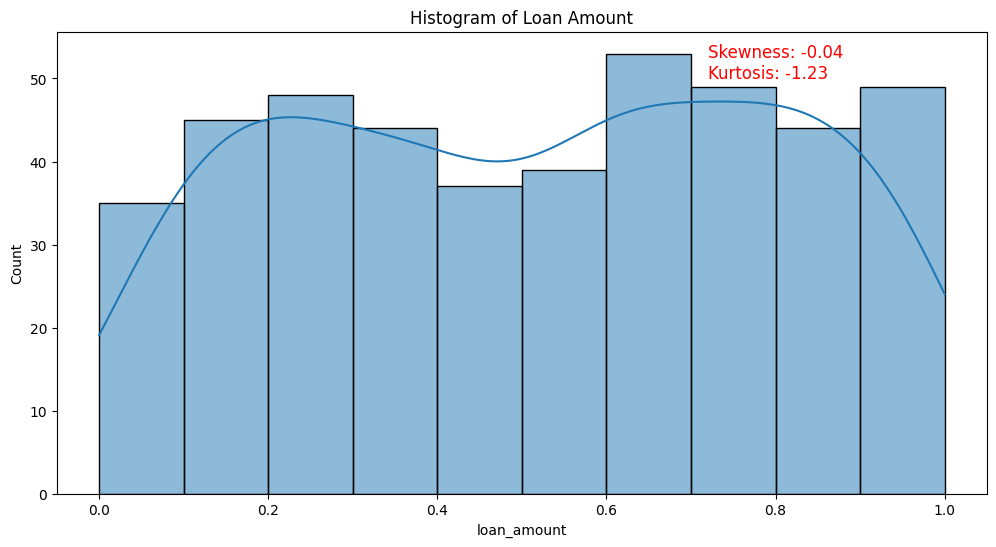

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['loan_amount'], kde=True)
plt.title("Histogram of Loan Amount")

skewness = df['loan_amount'].skew()
kurtosis = df['loan_amount'].kurtosis()

plt.annotate(f'Skewness: {skewness:.2f}\nKurtosis: {kurtosis:.2f}',
             xy=(0.7, 0.9), xycoords='axes fraction', fontsize=12, color='red')

plt.show()


Skewness is a statistical measure that describes the asymmetry of a probability distribution. It indicates the extent to which a distribution deviates from being symmetrical.

Formula:
Skewness = (3 * (Mean - Median)) / Standard Deviation

where:
Mean: The average value of the dataset.
Median: The middle value of the dataset when it is sorted in ascending order.
Standard Deviation: A measure of the spread of the dataset.

Base on the result of skewness value of -0.04 is close to zero, suggesting a distribution that is approximately symmetric. It indicates a subtle tendency towards being left-skewed, but the skewness is very close to zero, so the distribution is relatively balanced.


---


Kurtosis: Kurtosis measures the peakedness or flatness of a distribution.
Kurtosis is a statistical measure that describes the shape of a probability distribution. It quantifies the heaviness of the tails and the presence of outliers in a distribution.

Formula:
Kurtosis = (Sum of (x - Mean)^4) / (n * Standard Deviation^4)

where:
x: Each value in the dataset.
Mean: The average value of the dataset.
n: The number of values in the dataset.
Standard Deviation: A measure of the spread of the dataset.

kurtosis value of -1.23 is negative, suggesting a distribution that is somewhat platykurtic. This means that the distribution has lighter tails and a flatter central peak compared to a normal distribution.

#Step 9: As for the categorical features, apply encoding of categorical variables into dummy variables using pd.get_dummies approach. Show the first five (5) rows.

In [ ]:
df_encoded = pd.get_dummies(df)

# Display the first 5 rows of the encoded dataset
print(df_encoded.head())

           loan_amount  repaid   loan_id      rate  loan_type_cash  \
client_id                                                            
46109         0.909867     0.0  0.118063  0.169707               0   
46109         0.640785     0.0  0.491927  0.098335               0   
46109         0.844782     1.0  0.494955  0.053132               0   
46109         0.829795     1.0  0.296165  0.097542               1   
46109         0.936026     1.0  0.709384  0.247423               0   

           loan_type_credit  loan_type_home  loan_type_other  \
client_id                                                      
46109                     0               1                0   
46109                     1               0                0   
46109                     0               1                0   
46109                     0               0                0   
46109                     1               0                0   

           loan_start_2000-01-26  loan_start_2000-03-06  ...

#Step 10: Create new derived features to calculate the tenure of the loan by using the loan_start and loan_end.

In [ ]:
df['loan_start'] = pd.to_datetime(df['loan_start'])
df['loan_end'] = pd.to_datetime(df['loan_end'])
df['loan_tenure'] = (df['loan_end'] - df['loan_start']).dt.days

#Step 11: Split the data into training and test sets with 80-20 division.

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
